In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeRegressor #a single decision tree
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

df = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
df.Price

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [3]:
df_2 = df.copy()
# df_2 = df_2.dropna(axis=0)
output = df_2.Price

In [4]:
# Imputation
my_imputer = SimpleImputer()
# clm = df_2.columns.to_series().groupby(df_2.dtypes).groups
# {k.name: v for k, v in clm.items()}
# df_2.select_dtypes(include=['int64','float64'])
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(df_2.select_dtypes(include=['int64','float64'])))
imputed_X_train.columns = df_2.select_dtypes(include=['int64','float64']).columns
# df_3 = pd.concat([imputed_X_train, ], verify_integrity=True)
# df_3
df_3 = imputed_X_train.join(df_2.select_dtypes(include=['object']))
df_3

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,144.99840,4019.0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,144.99340,4019.0,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,144.99440,4019.0,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,144.99690,4019.0,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,144.99410,4019.0,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4.0,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,145.16761,7392.0,Wheelers Hill,12 Strada Cr,h,S,Barry,26/08/2017,NaN,South-Eastern Metropolitan
13576,3.0,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,144.87904,6380.0,Williamstown,77 Merrett Dr,h,SP,Williams,26/08/2017,NaN,Western Metropolitan
13577,3.0,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,144.88738,6380.0,Williamstown,83 Power St,h,S,Raine,26/08/2017,NaN,Western Metropolitan
13578,4.0,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,...,144.89299,6380.0,Williamstown,96 Verdon St,h,PI,Sweeney,26/08/2017,NaN,Western Metropolitan


In [5]:
X = df_3.copy()
y = X.pop("Price")
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Address          1.425040
Suburb           0.402302
Postcode         0.321039
Rooms            0.222100
Bedroom2         0.212303
Propertycount    0.206786
Distance         0.205845
CouncilArea      0.197529
BuildingArea     0.191718
Type             0.174793
SellerG          0.171337
Longtitude       0.154422
Lattitude        0.148885
Landsize         0.141966
Bathroom         0.129328
Method           0.113428
Regionname       0.103847
YearBuilt        0.096986
Car              0.093446
Date             0.018266
Name: MI Scores, dtype: float64

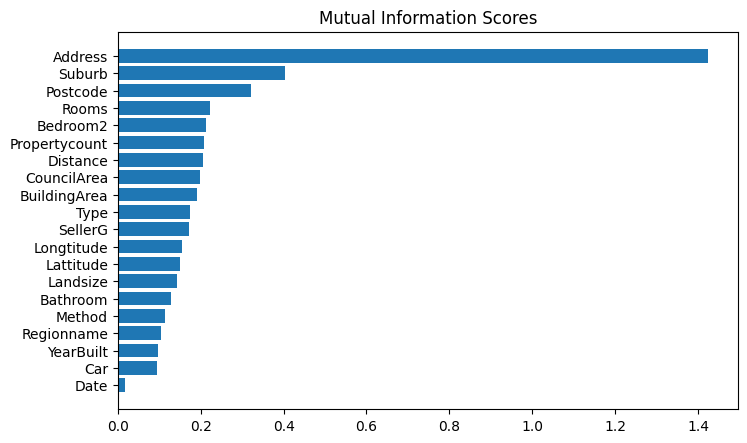

In [6]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [7]:
df_3=df_3.dropna(axis=0)
output = df_3.Price
# features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','CouncilArea','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname','Method','Car','Date']
features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2','CouncilArea','Type','Propertycount','SellerG','Distance','Landsize','YearBuilt','Bathroom','Lattitude','Longtitude','Regionname']
# features = ['Address','BuildingArea','Suburb','Postcode','Rooms','Bedroom2']
inputs = df_3[features]

inputs

,Address,BuildingArea,Suburb,Postcode,Rooms,Bedroom2,CouncilArea,Type,Propertycount,SellerG,Distance,Landsize,YearBuilt,Bathroom,Lattitude,Longtitude,Regionname
0,85 Turner St,151.96765,Abbotsford,3067.0,2.0,2.0,Yarra,h,4019.0,Biggin,2.5,202.0,1964.684217,1.0,-37.79960,144.99840,Northern Metropolitan
1,25 Bloomburg St,79.00000,Abbotsford,3067.0,2.0,2.0,Yarra,h,4019.0,Biggin,2.5,156.0,1900.000000,1.0,-37.80790,144.99340,Northern Metropolitan
2,5 Charles St,150.00000,Abbotsford,3067.0,3.0,3.0,Yarra,h,4019.0,Biggin,2.5,134.0,1900.000000,2.0,-37.80930,144.99440,Northern Metropolitan
3,40 Federation La,151.96765,Abbotsford,3067.0,3.0,3.0,Yarra,h,4019.0,Biggin,2.5,94.0,1964.684217,2.0,-37.79690,144.99690,Northern Metropolitan
4,55a Park St,142.00000,Abbotsford,3067.0,4.0,3.0,Yarra,h,4019.0,Nelson,2.5,120.0,2014.000000,1.0,-37.80720,144.99410,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,87 Pasco St,151.96765,Williamstown,3016.0,3.0,3.0,Hobsons Bay,h,6380.0,Jas,6.8,296.0,1964.684217,1.0,-37.86335,144.89487,Western Metropolitan
12209,201/152 Peel St,61.60000,Windsor,3181.0,2.0,2.0,Stonnington,u,4380.0,hockingstuart,4.6,0.0,2012.000000,1.0,-37.85581,144.99025,Southern Metropolitan
12210,60 Saltlake Bvd,151.96765,Wollert,3750.0,3.0,3.0,Whittlesea,h,2940.0,Stockdale,25.5,400.0,1964.684217,2.0,-37.61387,145.03850,Northern Metropolitan
12211,2 Adeney St,151.96765,Yarraville,3013.0,2.0,2.0,Maribyrnong,h,6543.0,hockingstuart,6.3,269.0,1964.684217,1.0,-37.81649,144.86731,Western Metropolitan


In [8]:
s = (inputs.dtypes == 'object')
object_cols = list(s[s].index)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(inputs[object_cols]))
OH_cols_train.index = inputs.index
num_X_train = inputs.drop(object_cols, axis=1)
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_train.head()

,BuildingArea,Postcode,Rooms,Bedroom2,Propertycount,Distance,Landsize,YearBuilt,Bathroom,Lattitude,...,12631,12632,12633,12634,12635,12636,12637,12638,12639,12640
0,151.96765,3067.0,2.0,2.0,4019.0,2.5,202.0,1964.684217,1.0,-37.7996,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,79.00000,3067.0,2.0,2.0,4019.0,2.5,156.0,1900.000000,1.0,-37.8079,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,150.00000,3067.0,3.0,3.0,4019.0,2.5,134.0,1900.000000,2.0,-37.8093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,151.96765,3067.0,3.0,3.0,4019.0,2.5,94.0,1964.684217,2.0,-37.7969,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,142.00000,3067.0,4.0,3.0,4019.0,2.5,120.0,2014.000000,1.0,-37.8072,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_X, val_X, train_y, val_y = train_test_split(X_train, output, random_state = 0)

In [10]:
# decision tree
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
    model.fit(train_X,train_y)
    predicted_home_prices = model.predict(val_X)
    MAE = mean_absolute_error(val_y, predicted_home_prices)
    return MAE

In [11]:
# random forest 
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=1)
    model.fit(train_X, train_y)
    predicted_home_prices = model.predict(val_X)
    MAE = mean_absolute_error(val_y, predicted_home_prices)
    return MAE

In [12]:
# mae = get_mae(700, train_X, val_X, train_y, val_y)
# print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(700, mae))



print("MAE : ")
print(score_dataset(train_X, val_X, train_y, val_y))

MAE : 
176040.22279724863
